In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('Mall_Customers.csv')

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
X=data.iloc[:,[3,4]].values

In [10]:
X.shape

(200, 2)

# hierarchy

In [11]:
#to find clusters
import scipy.cluster.hierarchy as sch

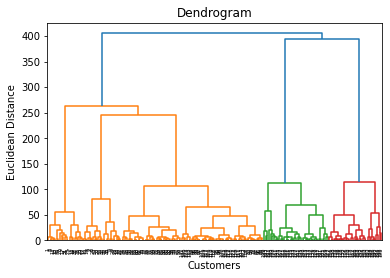

In [12]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [13]:
#so here we take n_clusters=5

In [14]:
#model
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc=AgglomerativeClustering(n_clusters=5)
y_hc=hc.fit_predict(X)

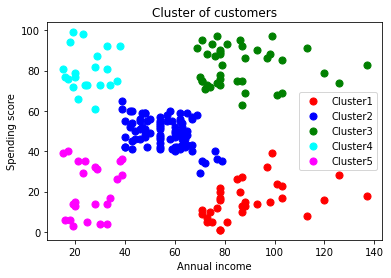

In [16]:
#visualize
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='Cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='Cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='cyan',label='Cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='Cluster5')

plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
X=sc.fit_transform(X)

# kmeans

In [20]:
from sklearn.cluster import KMeans

In [21]:
#to get K we use elbow method
wcss=[]

In [22]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

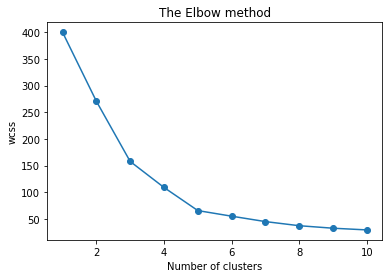

In [23]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
#so here we take k=5

In [25]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)
y_clusters=kmeans.predict(X)
y_clusters

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

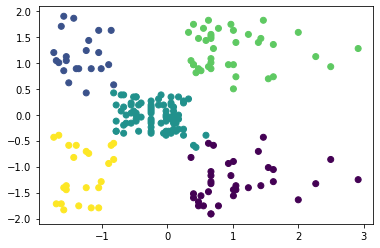

In [26]:
x1=X[:,0]
x2=X[:,1]
plt.scatter(x1,x2,c=y_clusters)